# Домашнее задание №2 - Линейные модели. Градиентный спуск

В этом домашнем задании мы с вами научимся обучать линейные модели регрессии и классификации при помощи очень мощного, но в то же время довольно понятного алгоритма, который называется **градиетный спуск**. Помимо линейных моделей он используется и для обучения самых сложных нейронных сетей! Также мы потренируемся применять готовые реализации линейных моделей для задач регрессии и бинарной классификации.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random
import pandas as pd

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from sklearn.exceptions import NotFittedError
from sklearn.linear_model import (LinearRegression,
                                  LogisticRegression)
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_classification
from sklearn.metrics import (r2_score,
                             mean_squared_error, 
                             mean_absolute_error, 
                             ConfusionMatrixDisplay, 
                             RocCurveDisplay, 
                             roc_curve, 
                             roc_auc_score)
from sklearn.model_selection import train_test_split

In [2]:
plt.rcParams["figure.figsize"] = 12, 9
sns.set_style("whitegrid")

SEED = 111
random.seed(SEED)
np.random.seed(SEED)

#### Маленькое теоретическое отступление

Основное свойство антиградиента (-1 * градиент) &ndash; он указывает в сторону наискорейшего убывания функции в данной точке. Соответственно, будет логично стартовать из некоторой точки, сдвинуться в сторону антиградиента, пересчитать антиградиент и снова сдвинуться в его сторону и т.д. Запишем это более формально.

Пусть $w_0$ &ndash; начальный набор параметров (коэффициентов линейной модели) ((например, нулевой или сгенерированный из некоторого, случайного распределения)). Тогда обычный градиентный спуск состоит в повторении следующих шагов до сходимости:


$$
    w_{k + 1} = w_{k} - \eta \nabla_{w} Q(w_{k}),
$$

где $\nabla_{w} Q(w_{k})$ &ndash; градиент функции потерь в точке $w_k$, а $\eta$ &ndash; скорость обучения (learning rate).

Градиентный спуск обычно останавливают, когда прошло заданное максимальное количество итераций или когда графиент близок к нулю (т.е. наши параметры практически не меняются). Для реализации второго варианта считают норму градиента (по сути длину вектора). Это можно сделать несколькими способами:

$$
l1_{norm} = \sum{|w_i|}
$$

$$
l2_{norm} = \sum{(w_i)^{2}}
$$

Попробуем разобраться на простом примере. Рассмотрим функцию от двух переменных:
$f(x, y) = \sin^2 x + \sin^2 y$

In [3]:
def f(w):
    """
    :param w: np.array(np.float) вектор из 2-х элементов
    :return: np.float
    """
    
    return np.sum(np.sin(w)**2)

Обратите внимание, что $x$ - numpy-array вектор длины 2.

***Reminder:***  
Что мы хотим? Мы хотим найти минимум этой функции (в машинном обучении мы обычно хотим найти минимум **функции потерь**, например, MSE), а точнее найти $w_1$ и $w_2$ такие, что при них значение $f(w_1, w_2)$ минимально, то есть *точку экстремума*.  
  
Как мы будем искать эту точку? Используем методы оптимизации (в нашем случае - *минимизации*). Одним из таких методов и является **градиентный спуск**.

### Задание 1. Градиентный спуск для функции $f$ (1 балл)

Реализуйте функцию, которая будет осуществлять градиентный спуск для функции $f$:

*Примечание:* Вам нужно посчитать частные производные именно **аналитически** и **переписать их в код**, а не считать производные численно (через отношение приращения функции к приращению аргумента) -- в этих двух случаях могут различаться ответы, поэтому будьте внимательны.

In [4]:
def grad_f(w): 
    """
    Градиент функциии f, определенной выше.
        :param w: np.array[2]: float вектор из 2-х элементов
        :return: np.array[2]: float вектор из 2-х элементов
    """
    
    return 2 * np.sin(w) * np.cos(w)

Проверим, что градиент принимает вектор из двух чисел и выдает на этой точке верное значение

In [5]:
assert np.allclose(grad_f(np.array([1, 2])), 
                   np.array([0.90929743, -0.7568025])), "Что-то не так!"

In [6]:
def grad_descent_2d(f, grad_f, lr, num_iter=100, x0=None):
    """
    Функция, которая реализует градиентный спуск в минимум для функции f от двух переменных. 
        :param f: скалярная функция двух переменных
        :param grad_f: функция, возвращающая градиент функции f (устроена как реализованная вами выше grad_f)
        :param lr: learning rate алгоритма
        :param num_iter: количество итераций градиентного спуска
        :return: np.array[num_iter, 2] пар вида (x, f(x))
    """
    
    w0 = np.random.random(2)

    # будем сохранять значения аргументов и значений функции 
    # в процессе град. спуска в переменную history
    history = []

    # итерация цикла == шаг градиентнго спуска
    curr_w = w0.copy()
    for iter_num in range(num_iter):
        entry = np.hstack((curr_w, f(curr_w)))
        history.append(entry)
    
        curr_w -= lr * grad_f(curr_w) #  YOUR CODE. Не забудьте про lr!

    return np.vstack(history)

Визуализируем точки градиентного спуска на 3D-графике нашей функции. Звездочками будут обозначены точки (тройки $w_1, w_2, f(w_1, w_2)$), по которым Ваш алгоритм градиентного спуска двигался к минимуму (Для того, чтобы написовать этот график, мы и сохраняли значения $cur\_w_1, cur\_w_2, f(cur\_w_1, cur\_w_2)$ в `steps` в процессе спуска).

Если у Вас правильно написана функция `grad_descent_2d`, то звездочки на картинке должны сходиться к одной из точек минимума функции. Вы можете менять начальные приближения алгоритма, значения `lr` и `num_iter` и получать разные результаты.

In [7]:
def gradient_desc_vis(f, grad_f, lr=0.1, num_iter=20):
    steps = grad_descent_2d(f, grad_f, lr=lr, num_iter=num_iter)
    
    X, Y = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))

    fig = plt.figure(figsize=(16, 10))
    ax = fig.gca(projection="3d")

    zs = np.array([f(np.array([x,y]))
                  for x, y in zip(np.ravel(X), np.ravel(Y))])
    Z = zs.reshape(X.shape)


    ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, zorder=2)

    ax.plot(xs=steps[:, 0], ys=steps[:, 1], zs=steps[:, 2],
            marker="*", markersize=20, zorder=3, 
            markerfacecolor="y", lw=3, c="black")

    ax.set_zlim(0, 5)
    ax.view_init(elev=60)
    plt.show()
    
    return steps

C:\Users\zlo\AppData\Local\Temp\ipykernel_8956\1727858522.py:7: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection="3d")


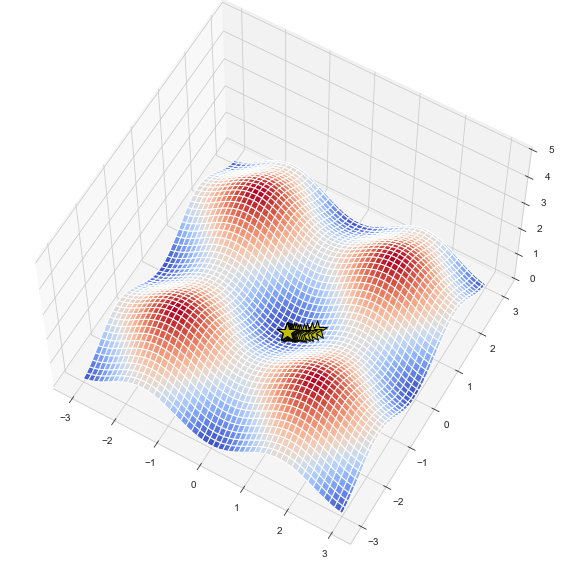

In [8]:
steps = gradient_desc_vis(f, grad_f)

Посмотрим на зависимость значения функции от шага градиентного спуска.

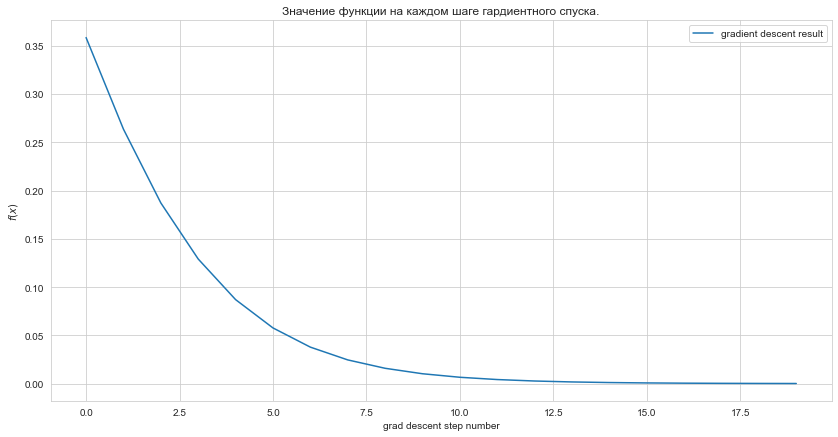

In [9]:
plt.figure(figsize=(14,7))
plt.xlabel("grad descent step number")
plt.ylabel("$f(x)$")
plt.title("Значение функции на каждом шаге гардиентного спуска.")

f_values = list(map(lambda x: x[2], steps))
plt.plot(f_values, label="gradient descent result")
plt.legend();

### Задание 2. Реализация линейной регресии (суммарно 9 баллов)

Так как мы будем использовать градиентный спуск для обучения модели, важной часть является реализация функции потерь и функции для расчета ее градиента. Перем началом стоит напомнить, как считать градиент MSE. Вывод этой формулы можно найти  [здесь](https://medium.com/analytics-vidhya/linear-regression-gradient-descent-intuition-and-math-c9a8f5aeeb22)

$$
    MSE = \frac{1}{N}\sum(y_{true} - y_{pred}) ^ 2
$$

$$
    \nabla{MSE} = \frac{2}{N} X^T (y_{pred} - y_{true})
$$

Здесь имеется в виду именно матричное умножение.

#### Задание 2.1. MSE и ее градиент (2 балла)

In [10]:
def mse(y_true, y_pred):
    """
    Функция потерь MSE.
        :param y_true: np.array[n_samples]: вектор из правильных ответов
        :param y_pred: np.array[n_samples]: вектор из предсказаний модели
        :return: значение функции потерь
    """
    
    if  y_true.shape[0] != y_pred.shape[0]:
        raise ValueError("Number of samples in both vectors should be equal")
        
    """
    YOUR CODE IS HERE
    """
    sum_pred = np.sum((y_true - y_pred)**2)
    return sum_pred / y_pred.shape[0]


def mse_grad(y_true, y_pred, X):
    """
    Функция для расчета градиента MSE.
        :param y_true: np.array[n_samples]: вектор из правильных ответов
        :param y_pred: np.array[n_samples]: вектор из предсказаний модели
        :param X: np.array[n_samples, n_features]: матрица объекты x признаки
        :return: градиент функции потерь MSE
    """
    
    if  y_true.shape[0] != y_pred.shape[0]:
        raise ValueError("Number of samples in both vectors should be equal")
        
    """
    YOUR CODE IS HERE
    """
    return (2 / y_pred.shape[0]) * (X.T @ (y_pred - y_true))
    


class MSELoss:
    """
    Класс, реализующий функцию потерь MSE. Нужен для того, чтобы
    объединять в одном месте функцию потерь и градиент для нее.
    """
    
    def __call__(self, y_true, y_pred):
        return mse(y_true, y_pred)
    
    def calculate_gradient(self, y_true, y_pred, X):
        return mse_grad(y_true, y_pred, X)

Мы будем использовать следующий класс для расчета градиента наших функций потерь:

In [11]:
class BasicGradientDescent:
    """
    Класс, позволяющий делать шаги градиентного спуска,
    а также рассчитывающих норму градиента.
    """
    
    def __init__(self, loss_function, grad_norm):
        self.loss = loss_function
        self.grad_norm = grad_norm
        
    
    def step(self, y, y_pred, X):
        grad_i = self.loss.calculate_gradient(y, y_pred, X)
        grad_i_norm = self._calculate_grad_norm(grad_i)
        
        return grad_i, grad_i_norm
            
            
    def _calculate_grad_norm(self, grad_i):
        if self.grad_norm == "l1":
            return np.abs(grad_i).sum()
        elif self.grad_norm == "l2":
            return np.sqrt(np.square(grad_i).sum())
        else:
            raise ValueError(f"I can't calculate {self.grad_norm} norm of gradient")

В данном задании нужно будет реализовать линейную регрессию и обучить ее при помощи градиентного спуска. Для этого нужно будет заполнять пропуски кода в соответствующих классах. Для начала мы реализуем базовый класс для всех линейных моделей, от которого потом будем наследоваться при реализации линейной и логистической регресий. Не переживайте, этот класс уже реализован, вам достостаточно просто разобраться с кодом.

In [12]:
class BaseLinearModel:
    """
    Класс, который представляет из себя базовую линейную модель, наследуюясь от которого, мы будем
    реализовывать линейную и логистическую регрессии.
    """
    
    def __init__(self, learning_rate, 
                 loss_function, fit_intercept,
                 n_iter, tol, optimizer, grad_norm):
        """
        Конструктор нашего класса. 
            :param learning_rate: скорость обучения
            :param loss_function: функция потерь (MSE или кросс-энтропия)
            :param fit_intercept: нужно ли нам включать свободных член в модель
            :param n_iter: количество итераций градиентного спуска
            :param tol: параметр для остановки градиентного спуска,
                        если норма градиента (l1 или l2) меньше tol, то останавливаемся
            :param optimizer: класс, который будет рассчитывать градиент и его норму
            :param grad_norm: тип нормы градиента l1 или l2
        """
        
        self.learning_rate = learning_rate
        self.loss = loss_function
        self.fit_intercept = fit_intercept
        self.n_iter = n_iter
        self.tol = tol
        self.grad_norm = grad_norm
        self.optimizer = optimizer(loss_function, grad_norm)
        
        # В начале параметры модели не заданы
        self.W = None
        
        
    def fit(self, X, y):
        """
        Метод для обучения нашей модели 
            :param X: матрица объекты x признаки
            :param y: вектор значений целевой переменной
            :return: обученная модель
        """
        
        # Сделаем из y вектор-столбец (n_samples, 1)
        y = y.reshape(-1, 1)
        n_samples = X.shape[0]
        
        # Добавим колонку из 1 в матрицу X
        if self.fit_intercept:
            ones_column = np.ones((n_samples, 1))
            X_new = np.hstack((ones_column, X))
        
        n_features = X_new.shape[1]
        
        # Инициализируем веса модели
        if self.W is None:
            self.W = np.random.randn(n_features, 1)
        
        # Обучаем модель градиентным спуском
        for i in range(self.n_iter):
            y_pred = self.predict(X)
            grad_i, grad_i_norm = self.optimizer.step(y, y_pred, X_new)
            
            # Если градиент близок к 0, останавливаемся
            if grad_i_norm <= self.tol:
                return self
            
            else:
                self.W -= self.learning_rate * grad_i
        
        return self
    
    
    def predict(self, X):
        raise NotImplementedError("It is a basic class for all linear models. You should implement it for descendant class.")
    
    
    def __repr__(self):
        return "Base linear model without prediction skill :("

#### Задание 2.2. Предсказания линейной регрессии (3 балла)

Реализуйте метод `predict` у класса `CustomLinearRegression`, не забудьте про свободный член!

In [13]:
class CustomLinearRegression(BaseLinearModel):
    def __init__(self, learning_rate: float = 1e-2, 
                 loss_function=MSELoss(), fit_intercept=True,
                 n_iter=1000, tol=1e-5, optimizer=BasicGradientDescent, grad_norm="l1"):
        
        # Если вы не проходили наследование и в частности `super`, то не страшно
        # коротко, с помощью этого мы можем вызывать методы родительского класса
        # в частности здесь мы используем метод `init`
        super().__init__(learning_rate=learning_rate, 
                         loss_function=loss_function, fit_intercept=fit_intercept,
                         n_iter=n_iter, tol=tol, optimizer=optimizer, grad_norm=grad_norm)
        
    
    def predict(self, X_test):
        """
        Метод для вычисления предсказаний 
            :param X_test: np.array[n_test_samples, n_features]: 
                           матрица объекты x признаки (тестовый датасет)
            :return: y_pred: np.array[n_test_samples, 1]: предсказания модели
        """
        
        if self.W is None:
            raise NotFittedError("This CustomLinearRegression instance is not fitted yet, run fit method.")
        
        n_test_samples = X_test.shape[0]
        if self.fit_intercept:
            ones_column = np.ones((n_test_samples, 1))
            X_test = np.hstack((ones_column, X_test))
            
        """
        YOUR CODE IS HERE
        """
        y_pred = X_test @ self.W
        return y_pred
    
    
    def __repr__(self):
        return "My custom linear regression"

##### Проверим нашу реализацию на простом примере

In [14]:
X = np.random.randn(100, 1)
y = 2 * X + 5 + 0.5 * np.random.randn(100, 1)

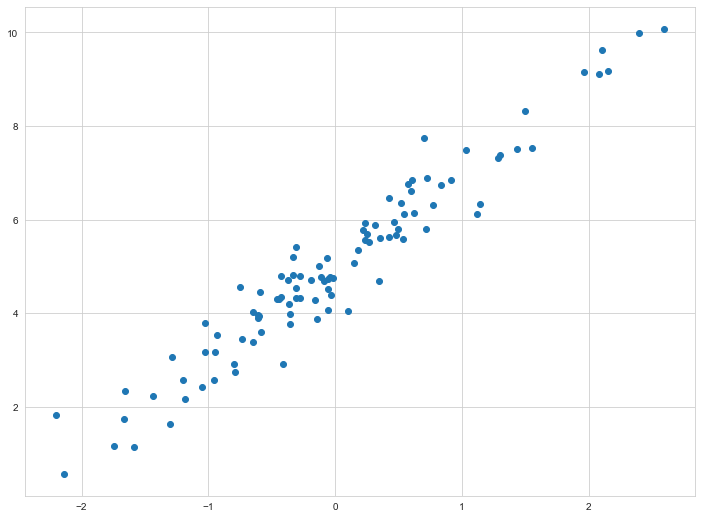

In [15]:
plt.scatter(X, y);

In [16]:
custom_lin_reg = CustomLinearRegression()

In [17]:
custom_lin_reg.fit(X, y)

My custom linear regression

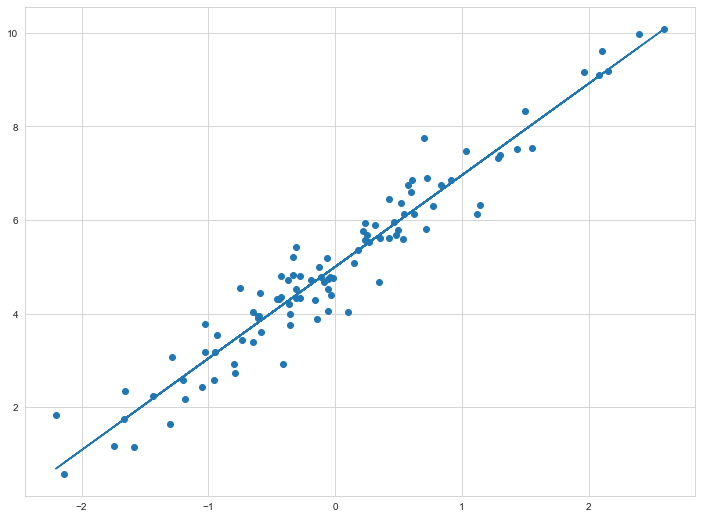

In [18]:
plt.scatter(X, y);
plt.plot(X, custom_lin_reg.predict(X));

In [19]:
custom_lin_reg.W

array([[4.9997881 ],
       [1.95949099]])

#### Задание 2.3. Используем встроенную линейную регрессию (4 балла)

Поработаем с данными о ценах на дома в Бостоне. Постройте модель линейной регресии при помощи `LinearRegression` из `sklearn`. Не забудьте разделить данные на тренировочную и тестовую части, а также правильно предобработать признаки. В конце воспользуйтесь какими-то изученными метриками регресии и сделайте выводы о качестве полученной модели, а также о том, какие признаки наиболее важны с точки зрения полученной модели.

In [20]:
data = load_boston()
X, y = data["data"], data["target"]
feature_names = data["feature_names"]

C:\Users\zlo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the 

Ваш ход:

##### EDA

**Описание из источника**

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
 prices and the demand for clean air', J. Environ. Economics & Management,
 vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
 ...', Wiley, 1980.   N.B. Various transformations are used in the table on
 pages 244-261 of the latter.

*Variables in order:*
* **CRIM**     per capita crime rate by town
* **ZN**       proportion of residential land zoned for lots over 25,000 sq.ft.
* **INDUS**    proportion of non-retail business acres per town
* **CHAS**     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* **NOX**      nitric oxides concentration (parts per 10 million)
* **RM**       average number of rooms per dwelling
* **AGE**      proportion of owner-occupied units built prior to 1940
* **DIS**      weighted distances to five Boston employment centres
* **RAD**      index of accessibility to radial highways
* **TAX**      full-value property-tax rate per \$10,000
* **PTRATIO**  pupil-teacher ratio by town
* **B**        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* **LSTAT**    \% lower status of the population
* **MEDV**     Median value of owner-occupied homes in $1000's  <----------- target

In [21]:
named_vars = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
X.shape

(506, 13)

''

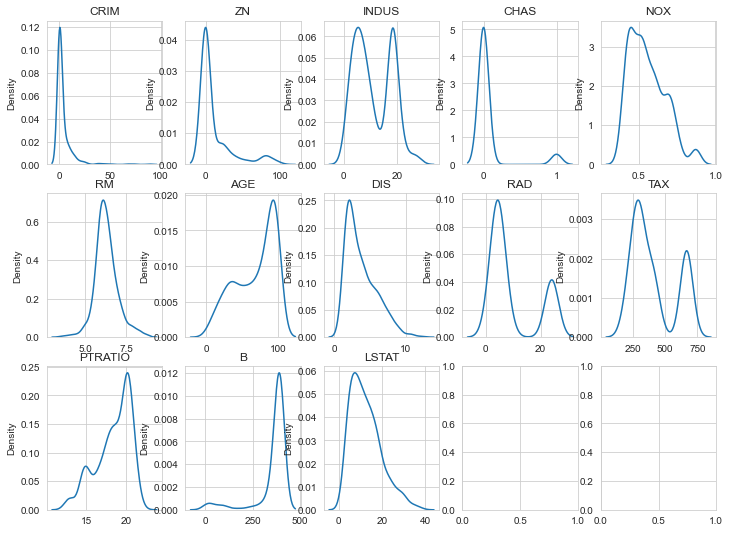

In [22]:
fig, axs = plt.subplots(3, 5)
axs = axs.ravel()

for i, ax in enumerate(axs):
    sns.kdeplot(X[:, i], ax=ax)
    ax.set_title(named_vars[i])
    if i == 12:
        break
;

Видно, что переменные не стандартизованы, есть сколько-то явно бимодальных распределений и т.д.

##### Linear regression model

Разделим выборку, стандартизуем переменные и применим применим модель линейной регрессии (с помощью Pipeline):

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

pipe = Pipeline(steps=[('scaler', StandardScaler()), ('linear_regr', LinearRegression())])
pipe.fit(X_train, y_train)
pred_y = pipe.predict(X_test)

##### Метрики

In [24]:
print(f'r2 score: {r2_score(y_test, pred_y)}', 
      f'mean absolute error: {mean_absolute_error(y_test, pred_y)}', 
      f'mean squared error: {mean_squared_error(y_test, pred_y)}', sep='\n')

r2 score: 0.6914233016538058
mean absolute error: 3.6337882972455167
mean squared error: 29.544878850012978


##### Коэффициеты модели

In [25]:
pipe.named_steps['linear_regr'].coef_

array([-1.04639505,  1.10072608, -0.53149855,  0.49881025, -1.44883668,
        2.1497714 ,  0.01501882, -3.01970709,  2.73485053, -2.45524606,
       -1.69204702,  0.81218806, -3.80836301])

In [26]:
for i in range(13):
    print(named_vars[i], pipe.named_steps['linear_regr'].coef_[i])

CRIM -1.0463950483240756
ZN 1.1007260828655603
INDUS -0.5314985492442438
CHAS 0.4988102495847759
NOX -1.4488366753181952
RM 2.1497714011391746
AGE 0.01501881975616215
DIS -3.019707091049034
RAD 2.73485052831132
TAX -2.4552460601855346
PTRATIO -1.6920470153925882
B 0.8121880570464648
LSTAT -3.8083630089226657


В целом модель не слишком ужасна :) 

$R^2$ близок к $1$, $MSE$ и $MAE$ не слишком велики. $MAE$ вообще близок к $0$, что в сравнении с $MSE$ говорит о том, что в модели возможно много отклоняющихся от среднего значений (об этом же говорят графики распределения). Ещё, возможно, есть корреляция между переменными (есть что-то похожее на нелинейные зависимости).

In [27]:
#sns.pairplot(pd.DataFrame(X))

### Задание 3. Реализация логистической регресии (суммарно 10 баллов)

Логистическая регрессия не очень сильно отличается от обычной линейной регрессии и используется в задах классификации. Так как здесь мы снова будем пользоваться градиентным спуском, то нужно определить функцию потерь и ее градиент. Одним из самых популярных вариантов в задаче бинарной классификации является бинарная кросс-энтропия (BCE).

$$\mathcal L_{BCE}(y, \hat y) = -\sum_i \left[y_i\log\sigma(\hat y_i) + (1-y_i)\log(1-\sigma(\hat y_i))\right].$$

где $y$ это  таргет желаемого результата и $\hat y$ является выходом модели. $\sigma$ - это [*логистическая* функция](https://en.wikipedia.org/wiki/Sigmoid_function), который преобразует действительное число $\mathbb R$ в вероятность $[0,1]$.

Единственная проблема данной функции это возможность получить 0 под знаком логарифма, что не очень хорошо. Попробуем справить с этим "в лоб". Скажем, что наши предсказания могут принимать значения от 0 + eps до 1 - eps, где eps очень маленькое число.

#### Задание 3.1. Реализация сигмоиды (0.5 баллов)

Реализуйте функцию `sigmoid`, которая переводит действительное число $\mathbb R$ в вероятность $[0,1]$.

In [28]:
def sigmoid(output):
    # output результат X@w (-inf, +inf)
    """
    YOUR CODE IS HERE
    """
    return 1 / (1 + (np.e**(-output)))

#### Задание 3.2. BCE Loss и ее градиент (2.5 балла)

Так как мы с вами только начинаем изучать машинное обучение, то было бы слишком жестоко просить вас вычислить градиент BCE Loss (он не так сложен, просто нужно привыкнуть). Поэтому сразу напишем формулу для него:

$$
\nabla{\mathcal L_{BCE}(y, \hat y), X} = X^T (\sigma({\hat{y}}) - y)
$$

In [29]:
def bce(y_true, y_pred, eps=1e-15):
    """
    Функция потерь BCE.
        :param y_true: np.array[n_samples]: вектор из правильных ответов 0/1
        :param y_pred: np.array[n_samples]: вектор из предсказаний модели (вероятности)
        :return: значение функции потерь
    """
    
    if  y_true.shape[0] != y_pred.shape[0]:
        raise ValueError("Number of samples in both vectors should be equal")
        
    n = y_true.shape[0]
    
    # So I want escape log(0)
    y_pred = np.clip(y_pred, eps, 1 - eps)
    
    """
    YOUR CODE IS HERE
    """
    return (1 / n) * np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    

def bce_grad(y_true, y_pred, X):
    """
    Функция потерь BCE.
        :param y_true: np.array[n_samples]: вектор из правильных ответов 0/1
        :param y_pred: np.array[n_samples]: вектор из предсказаний модели (вероятности)
        :param X: np.array[n_samples, n_features]: матрица объекты x признаки
        :return: значение функции потерь
    """
    
    if  y_true.shape[0] != y_pred.shape[0]:
        raise ValueError("Number of samples in both vectors should be equal")
        
    """
    YOUR CODE IS HERE
    """
    return X.T @ (y_pred - y_true)


class BCELoss:
    """
    Класс, реализующий функцию потерь BCE. Нужен для того, чтобы
    объединять в одном месте функцию потерь и градиент для нее.
    """
    
    def __call__(self, y_true, y_pred):
        return bce(y_true, y_pred)
    
    def calculate_gradient(self, y_true, y_pred, X):
        return bce_grad(y_true, y_pred, X)

#### Задание 3.3. Предсказания логистической регрессии (2 балла)

Реализуйте метод `predict` у класса `CustomLogisticRegression`, не забудьте про свободный член!

In [30]:
class CustomLogisticRegression(BaseLinearModel):
    def __init__(self, learning_rate: float = 1e-3,
                 loss_function=BCELoss(), fit_intercept=True,
                 n_iter=1000, tol=1e-5, optimizer=BasicGradientDescent, grad_norm="l1"):
        
        super().__init__(learning_rate=learning_rate,
                         loss_function=loss_function, fit_intercept=fit_intercept,
                         n_iter=n_iter, tol=tol, optimizer=optimizer, grad_norm=grad_norm)
    
    
    def predict(self, X_test):
        if self.W is None:
            raise NotFittedError("This CustomLogisticRegression instance is not fitted, run fit method.")
        
        n_test_samples = X_test.shape[0]
        if self.fit_intercept:
            ones_column = np.ones((n_test_samples, 1))
            X_test = np.hstack((ones_column, X_test))
            
        """
        YOUR CODE IS HERE
        """
        y_pred = sigmoid(X_test @ self.W)
        return y_pred
    
    
    def __repr__(self):
        return "My custom logistic regression"

#### Снова проверим работу алгоритма на простом примере

In [31]:
# Создадим датасет из 1 признака и 2 классов
X, y = make_classification(n_features=1, n_informative=1,
                           n_redundant=0, n_clusters_per_class=1)

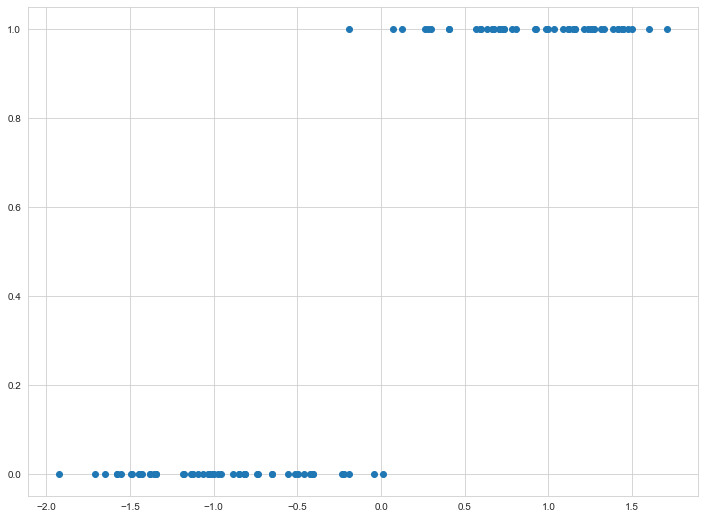

In [32]:
plt.scatter(X, y);

In [33]:
custom_log_reg = CustomLogisticRegression()
custom_log_reg.fit(X, y)
y_pred = custom_log_reg.predict(X)

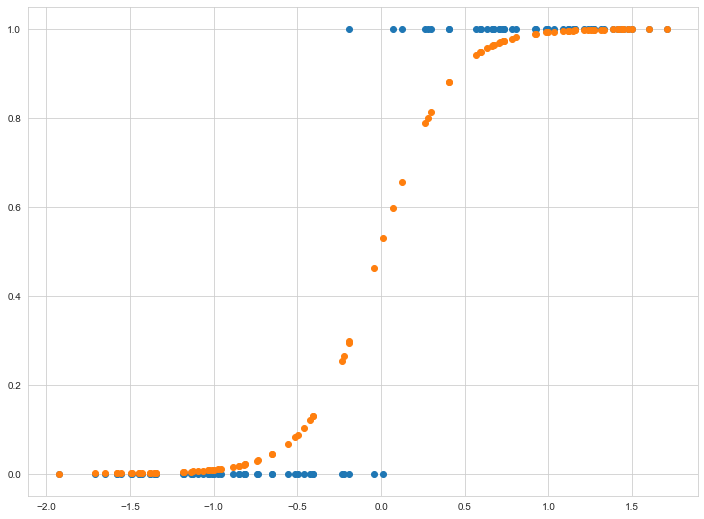

In [34]:
plt.scatter(X, y)
plt.scatter(X, y_pred);

Проверьте качество работы модели при помощи известных вам метрик бинарной классификации.

In [35]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

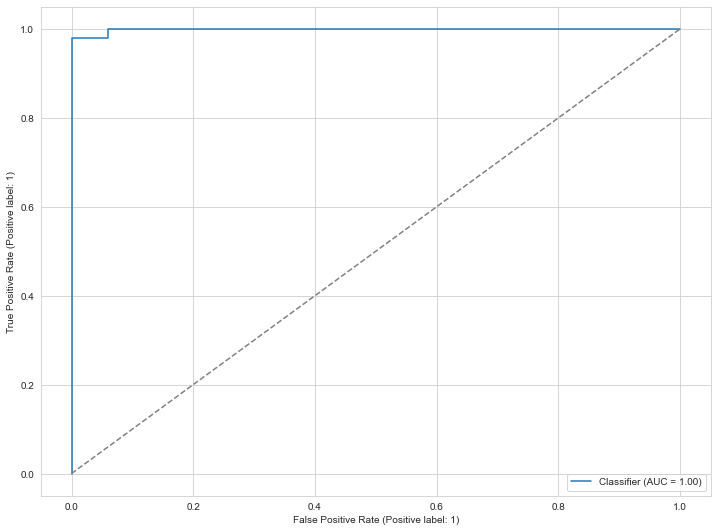

In [36]:
RocCurveDisplay.from_predictions(y, y_pred)
plt.plot([0, 1], [0, 1], color="grey", linestyle="--")

Определим оптимальный threshhold:

In [37]:
fpr, tpr, thresholds = roc_curve(y, y_pred)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Threshold value is:", optimal_threshold)

Threshold value is: 0.5961986493019866


In [38]:
y_pred = np.where(y_pred <= optimal_threshold, 0, 1)

In [39]:
print('precision_score', precision_score(y, y_pred))
print('recall_score', recall_score(y, y_pred))
print('f1_score', f1_score(y, y_pred))
print('accuracy_score', accuracy_score(y, y_pred))

precision_score 1.0
recall_score 0.96
f1_score 0.9795918367346939
accuracy_score 0.98


Выглядит неплохо (может я где-то ошиблась?)

#### Задание 3.4. Применение логистической регрессии (5 баллов)

Мы будем использовать данные по свойствам покемонов (https://www.kaggle.com/abcsds/pokemon). В данном задании вам необходимо сначала сделать краткий EDA (Посмотреть на данные и их распределения, а также посмотреть, как различные признаки связаны между собой и с целевой переменной (`Legendary`)).

In [40]:
pokemon = pd.read_csv("Pokemon.csv")
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


##### EDA

Мы будем предсказывать является ли покемон легендарным или нет. Замените логическое значение колонки на числовое (перекодировав на 0 и 1). Также подумайте, как в этом случае лучше закодировать категориальные признаки (может быть, лучше их просто выбросить?).

In [41]:
pokemon.columns = ['#', 'Name', 'Type_1', 'Type_2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp_Atk', 'Sp_Def', 'Speed', 'Generation', 'Legendary']
pokemon.Legendary = pokemon.Legendary.astype(int)

In [42]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type_1      800 non-null    object
 3   Type_2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp_Atk      800 non-null    int64 
 9   Sp_Def      800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    int32 
dtypes: int32(1), int64(9), object(3)
memory usage: 78.2+ KB


Проблемные переменные: `#`, `Name`, `Type_1`, `Type_2`. Вызывает вопросы `Generation`.

Проверим, можно ли исключить колонку `Name` (да):

In [43]:
pokemon.shape[0] == pd.unique(pokemon.Name).shape[0]

True

Набор категорий `Type_1` и `Type_2`:

In [44]:
pd.unique(pokemon.Type_1)

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

In [45]:
pd.unique(pokemon.Type_2)

array(['Poison', nan, 'Flying', 'Dragon', 'Ground', 'Fairy', 'Grass',
       'Fighting', 'Psychic', 'Steel', 'Ice', 'Rock', 'Dark', 'Water',
       'Electric', 'Fire', 'Ghost', 'Bug', 'Normal'], dtype=object)

Посмотрим на количество и взаимосвязь Type_1 и Type_2:

<AxesSubplot:xlabel='Type_1', ylabel='Count'>

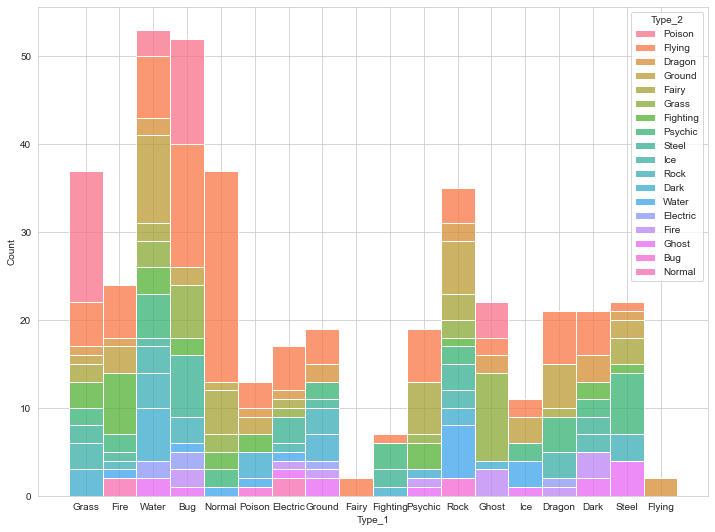

In [46]:
sns.histplot(data=pokemon, x="Type_1", hue="Type_2", discrete=True, multiple="stack")

Тут мне пришла в голову идея добавить переменную Is_dual, которая хоть как-то отражает объединенные данные Type_1 и Type_2 (от которых я планирую избавиться)

In [47]:
pokemon['Is_dual'] = pokemon.Type_2.notna().astype(int)

И уже под конец я решила посмотреть на влияние Type_1 на Legendary (но модель переделывать уже не стала):

<AxesSubplot:xlabel='Type_1', ylabel='Count'>

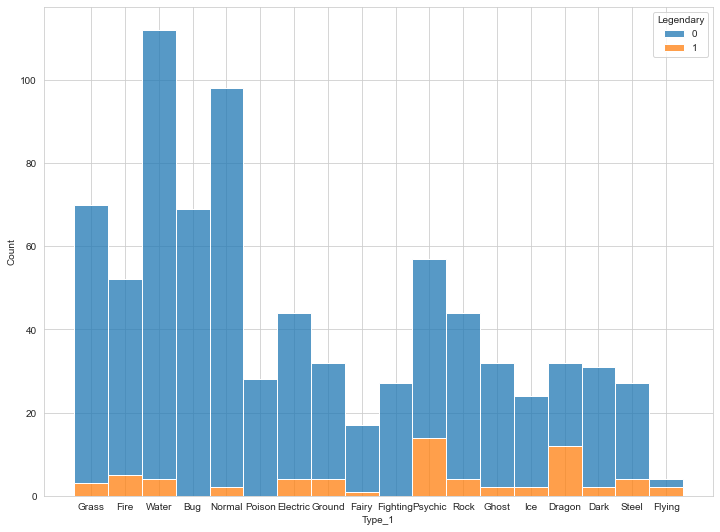

In [48]:
sns.histplot(data=pokemon, x="Type_1", hue="Legendary", discrete=True, multiple="stack")

Я решила исключить категориальные переменные Type_1 и Type_2 из анализа и добавить переменную Is_dual, отражающую двойной тип покемона. Скорее всего я ещё об этом пожалею (из графика выше можно сделать вывод, что эти переменные, вообще говоря, выжны для классификации), но посмотрим, что получится.

Исключим категориальные колонки и посмотрим на распределение и возможную зависимость пременных (`sns.pairplot`):

In [49]:
pr_pokemon = pokemon.iloc[:, 4:]

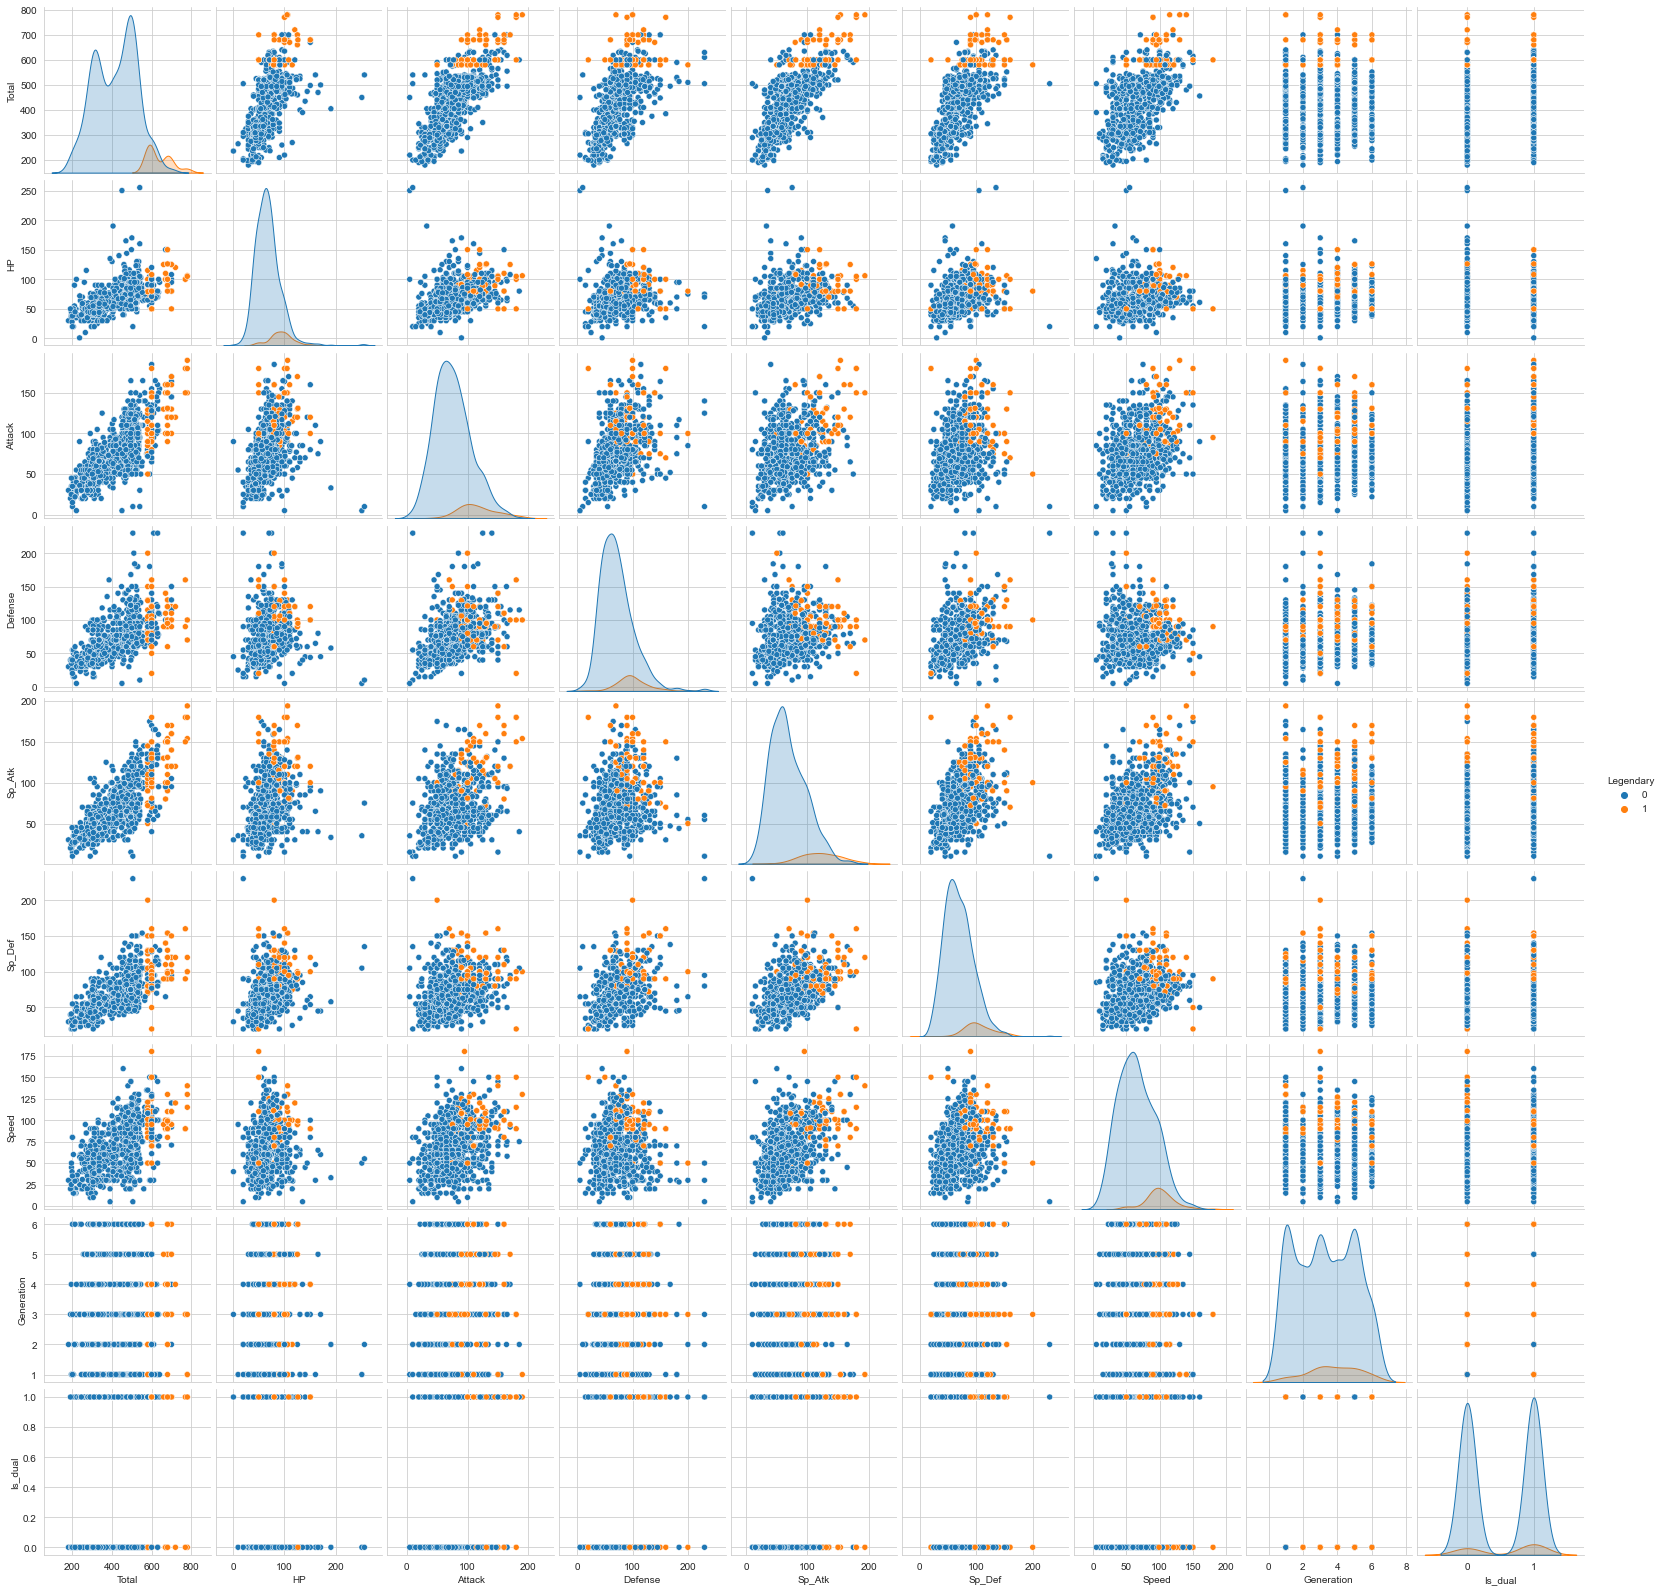

In [50]:
sns.pairplot(pr_pokemon, hue="Legendary")

Из-за pairplot полезла искать описание переменной Total.

Я решила исключить из модели переменную Total, тк это по сути сумма всех переменных (не независимая переменная).

##### Разделение, стандартизация и обучение модели

In [98]:
X_train, X_test, y_train, y_test = train_test_split(pr_pokemon.drop('Legendary', axis=1), pr_pokemon.Legendary, test_size=0.33, stratify=pr_pokemon.Legendary)
X_train_7, X_test_7 = X_train.drop(['Total'], axis=1), X_test.drop(['Total'], axis=1)

pipe = Pipeline(steps=[('scaler', StandardScaler()), ('log_regr', LogisticRegression())])
pipe.fit(X_train_7, y_train)
pred_y = pipe.predict(X_test_7)

##### Метрики и ROC кривая

Выведите метрики вашего классификатора:

1. Нарисуйте [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html).

2. Изобразите ROC кривую и посчитайте площадь под ней.

3. Скажите, какие признаки оказались наиболее важны для модели.

In [96]:
plt.rcParams["figure.figsize"] = 7, 7
sns.set_style("white")

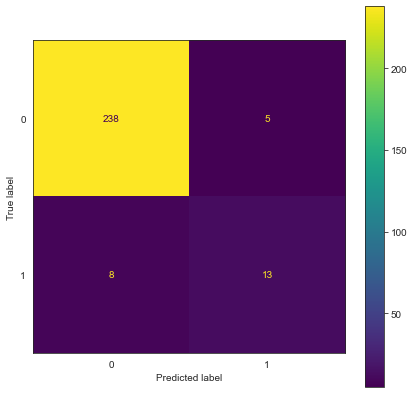

In [99]:
ConfusionMatrixDisplay.from_predictions(y_test, pred_y)

Судя по матрице будут относительно не высокие precision и recall (из-за дисбаланса классов).

**ROC кривая:**

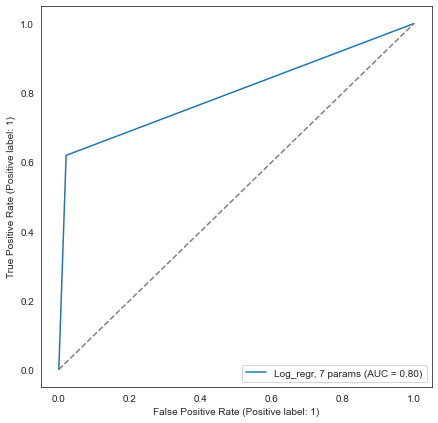

In [100]:
cur_1 = RocCurveDisplay.from_predictions(y_test, pred_y, name="Log_regr, 7 params")
plt.plot([0, 1], [0, 1], color="grey", linestyle="--");

Очень странная какая-то получилась.. Но AUC заметно больше 0.5:

In [101]:
roc_auc_score(y_test, pred_y)

0.7992357436801881

##### Скоры переменных

In [102]:
pipe.named_steps['log_regr'].coef_

array([[ 0.80838443,  0.50244655,  0.93804721,  1.04712088,  1.17827883,
         1.49283234,  0.87191687, -0.15283142]])

In [104]:
named_vars = ['HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed', 'Generation', 'Is_dual']
for i in range(8):
    print(named_vars[i], pipe.named_steps['log_regr'].coef_[0][i])

HP 0.8083844306816975
Attack 0.5024465457364539
Defense 0.9380472102752618
Sp_Atk 1.0471208845493998
Sp_Def 1.1782788323237077
Speed 1.4928323435156459
Generation 0.871916871405153
Is_dual -0.1528314173712842


Самой значимой переменной оказалась скорость (и сопротивление спец атакам)

In [105]:
print('precision_score', precision_score(y_test, pred_y))
print('recall_score', recall_score(y_test, pred_y))
print('f1_score', f1_score(y_test, pred_y))

precision_score 0.7222222222222222
recall_score 0.6190476190476191
f1_score 0.6666666666666666


##### Что-то странное

В самом начале я исключила переменную Total, так как это сумма всех количественных параметров покемона. Если посмотреть, то легендарные покемоны стабильно имеют более высокое значение Total. Интересно, что будет, если все количественные признаки в модели заменить одной Total.

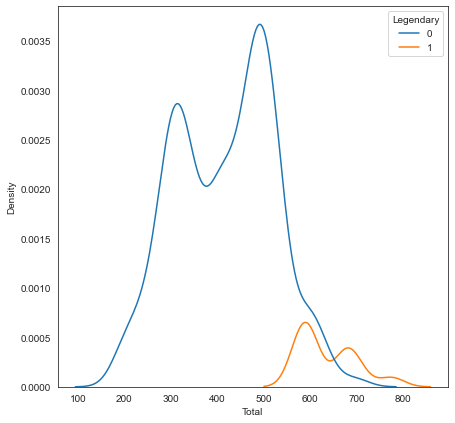

In [60]:
sns.kdeplot(data=pokemon, x="Total", hue="Legendary");

In [107]:
X_train_T, X_test_T = X_train[["Total", "Is_dual", "Generation"]], X_test[["Total", "Is_dual", "Generation"]]

pipe2 = Pipeline(steps=[('scaler', StandardScaler()), ('log_regr', LogisticRegression())])
pipe2.fit(X_train_T, y_train)
pred_y = pipe2.predict(X_test_T)

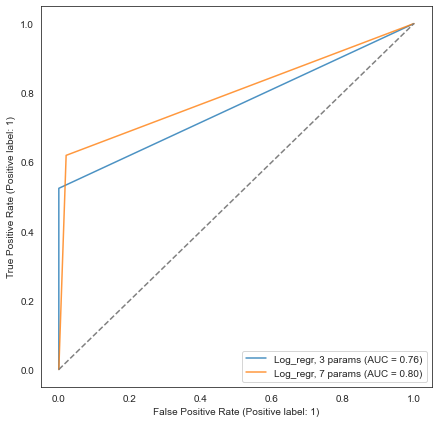

In [109]:
ax = plt.gca()
cur_2 = RocCurveDisplay.from_predictions(y_test, pred_y, ax=ax, alpha=0.8, name="Log_regr, 3 params")
cur_1.plot(ax=ax, alpha=0.8)
plt.plot([0, 1], [0, 1], color="grey", linestyle="--");

AUC модели, где все каличественные признаки заменены одной переменной всё-таки немного ниже.

In [110]:
print('precision_score', precision_score(y_test, pred_y))
print('recall_score', recall_score(y_test, pred_y))
print('f1_score', f1_score(y_test, pred_y))

precision_score 1.0
recall_score 0.5238095238095238
f1_score 0.6875000000000001


### Задание 4. Расскажите о вашей любимой музыкальной группе (исполнителе) (0.5 балла)

Расскажите, как вы познакомились с этой группой и скиньте несколько наиболее любимых треков)

ммм

нет))

## Therapy time

Напишите здесь ваши впечатления о задании: было ли интересно, было ли слишком легко или наоборот сложно и тд. Также сюда можно написать свои идеи по улучшению заданий, а также предложить данные, на основе которых вы бы хотели построить следующие дз. 

**Ваши мысли:**

Спасибо за ещё одно замечательное дз. Мне показалось, что это дз сложнее, но может быть это потому, что я недоразобралась в теме (но пока делала вроде уже лучше разобралась :)   ...надеюсь).

С последней моделью мне стоило повозиться подольше. Что-то я запуталась и только под конец поняла, что, может быть, надо было оставить эти типы покемонов для модели. И меня удручает получившаяся roc кривая, я где-то налажала, видимо))

ооо, и еще мне очень понравился 3d график, иллюстрирующий градиентный спуск!